# ROC curve and AUC
* For binary classification predictions
* Count True positive and False positive ratios for different tresholds
* The treshold means the numerical limit of the probability that is interpreted as true

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) on scikit home page.

In [1]:
print(__doc__)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc


Automatically created module for IPython interactive environment


## Data

In [90]:
y = [0, 0, 0, 1, 0, 1, 1, 0, 1, 1]
y_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
df = pd.DataFrame({"y": y, "y_prob": y_prob}).sort_values(by='y_prob', ascending=False).reset_index()
print(df)

   index  y  y_prob
0      9  1    0.99
1      8  1    0.90
2      7  0    0.80
3      6  1    0.70
4      5  1    0.60
5      4  0    0.50
6      3  1    0.40
7      2  0    0.30
8      1  0    0.20
9      0  0    0.10


[1.99 0.99 0.9  0.8  0.6  0.5  0.4  0.1 ]
[0.  0.  0.  0.2 0.2 0.4 0.4 1. ]
[0.  0.2 0.4 0.4 0.8 0.8 1.  1. ]


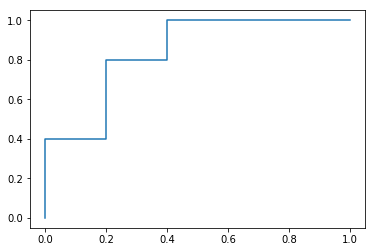

In [91]:
fpr, tpr, treshold_list = roc_curve(df["y"], df["y_prob"])

print(treshold_list)

print(fpr)
print(tpr)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr)

## Example of treshold

In [92]:
all_pos = np.where(df['y']==1, 1, 0).sum()
all_neg = np.where(df['y']==0, 1, 0).sum()
print("All trues: {}".format(cnt_all))

for t in treshold_list:
    tp = np.where((df['y_prob']>=t) & (df['y']==1), 1, 0).sum()
    fp = np.where((df['y_prob']>=t) & (df['y']==0), 1, 0).sum()
    
    print("-----")
    print("Treshold: {}".format(t))
    print("True positives: {}".format(tp))
    print("True positive rate: {}".format(tp/all_pos))
    print("False positivies: {}".format(fp))
    print("False positive rate: {}".format(fp/all_neg))

All trues: 6
-----
Treshold: 1.99
True positives: 0
True positive rate: 0.0
False positivies: 0
False positive rate: 0.0
-----
Treshold: 0.99
True positives: 1
True positive rate: 0.2
False positivies: 0
False positive rate: 0.0
-----
Treshold: 0.9
True positives: 2
True positive rate: 0.4
False positivies: 0
False positive rate: 0.0
-----
Treshold: 0.8
True positives: 2
True positive rate: 0.4
False positivies: 1
False positive rate: 0.2
-----
Treshold: 0.6
True positives: 4
True positive rate: 0.8
False positivies: 1
False positive rate: 0.2
-----
Treshold: 0.5
True positives: 4
True positive rate: 0.8
False positivies: 2
False positive rate: 0.4
-----
Treshold: 0.4
True positives: 5
True positive rate: 1.0
False positivies: 2
False positive rate: 0.4
-----
Treshold: 0.1
True positives: 5
True positive rate: 1.0
False positivies: 5
False positive rate: 1.0


## Plot ROC curve

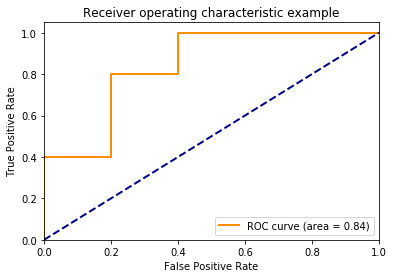

In [93]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()